# 03 - Bivariate Analysis

In [1]:
# All import insertions
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import isnull
from sklearn import preprocessing
import os    # For file paths
import re    # Regular Expressions

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Open files
df = pd.read_csv("../data/processed/data_univ.csv", low_memory=False)

In [3]:
df.dtypes.value_counts()

int64      38
object     14
float64     8
dtype: int64

In [4]:
df = df.loc[:, (df.dtypes == np.int64) | (df.dtypes == np.float64)]

In [5]:
df.var().sort_values()

Quarterbacks                  0.004816
Halfbacks                     0.031342
RunningBacks                  0.088394
Fullbacks                     0.134756
isFirstDown                   0.167405
TimeSnapDiff                  0.220384
IsPossTeamInLead              0.233709
IsPossTeamInDeficit           0.242434
isPlayDirectionLeft           0.249984
isHomeTeam                    0.249995
Centers                       0.287889
NoseTackles                   0.288974
Safeties                      0.299211
OffensiveTackles              0.329752
DistanceBins                  0.331656
TightEnds                     0.421219
Down                          0.457734
OffensiveGuards               0.506014
Cornerbacks                   0.544061
Season                        0.619343
WideReceivers                 0.624060
DefensiveTackles              0.708750
DefensiveEnds                 0.761547
LineBackers                   0.799857
A                             0.891905
DefendersInTheBox        

In [6]:
df.drop(['Quarterbacks','Halfbacks','RunningBacks','Fullbacks','TightEnds'], axis=1, inplace=True)

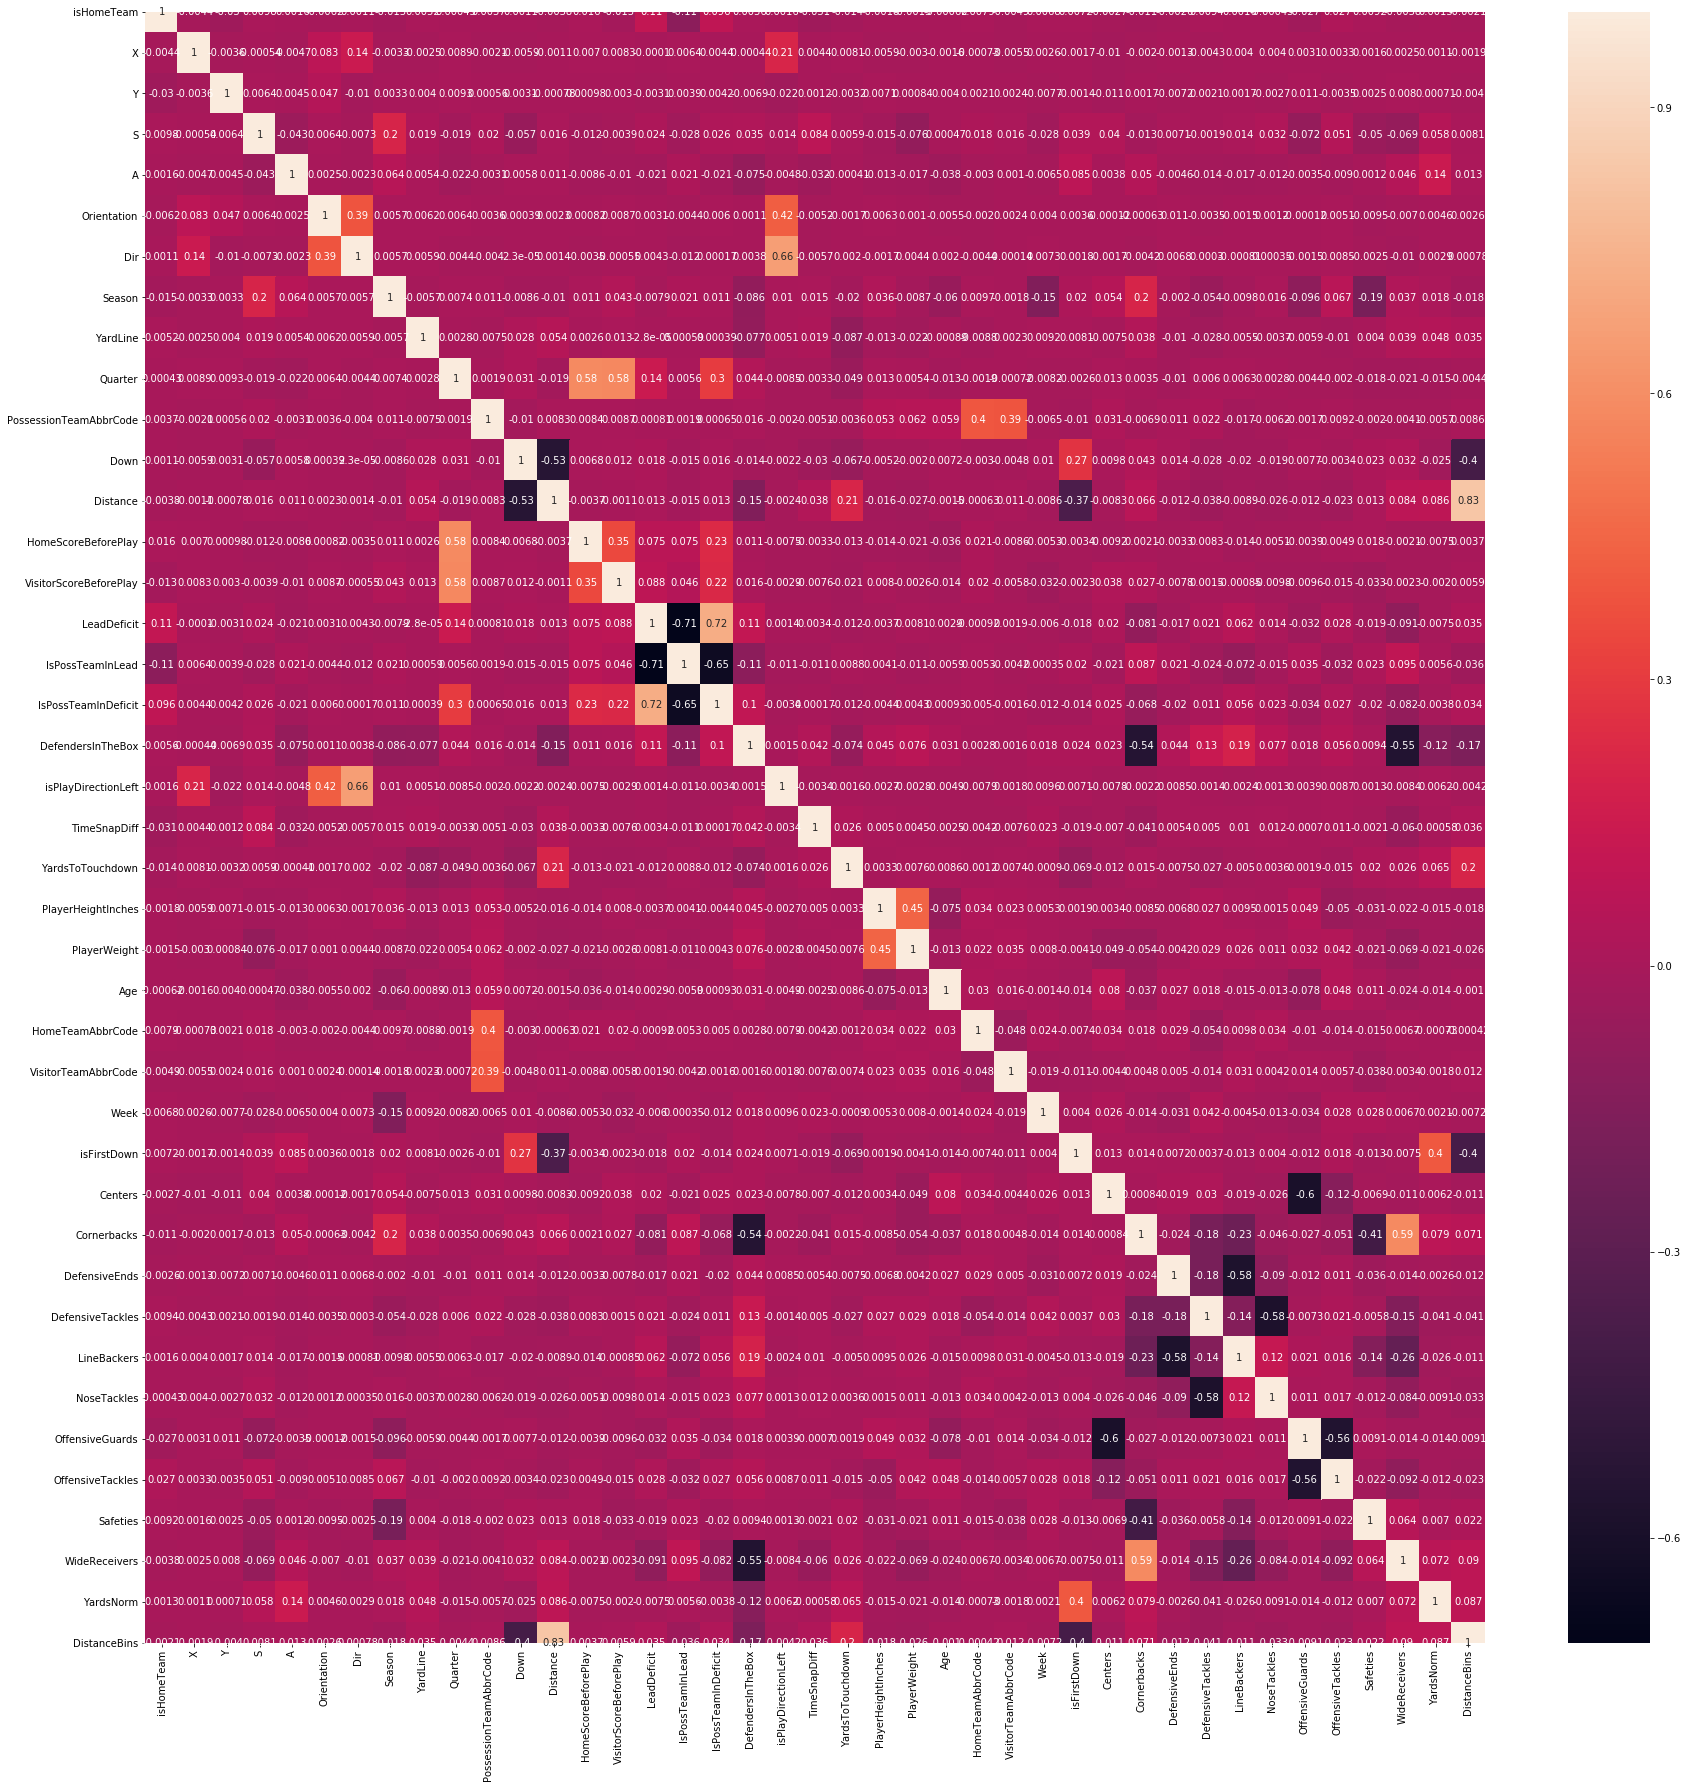

In [7]:
corrMatrix = df.corr(method = "kendall")
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corrMatrix, annot=True)
plt.savefig("../reports/figures/data_corr_matrix.png")

In [8]:
#Correlation with output variable
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["isFirstDown"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

isFirstDown    1.000000
YardsNorm      0.524819
Name: isFirstDown, dtype: float64

## Checking Correlation between Lead and Deficiit

In [9]:
print(df[["LeadDeficit","IsPossTeamInLead","IsPossTeamInDeficit"]].corr())

                     LeadDeficit  IsPossTeamInLead  IsPossTeamInDeficit
LeadDeficit             1.000000         -0.711931             0.730917
IsPossTeamInLead       -0.711931          1.000000            -0.646001
IsPossTeamInDeficit     0.730917         -0.646001             1.000000


In [10]:
df.drop(['LeadDeficit','IsPossTeamInDeficit'], axis=1, inplace=True)

In [11]:
df.dtypes

isHomeTeam                  int64
X                         float64
Y                         float64
S                         float64
A                         float64
Orientation               float64
Dir                       float64
Season                      int64
YardLine                    int64
Quarter                     int64
PossessionTeamAbbrCode      int64
Down                        int64
Distance                    int64
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
IsPossTeamInLead            int64
DefendersInTheBox           int64
isPlayDirectionLeft         int64
TimeSnapDiff              float64
YardsToTouchdown            int64
PlayerHeightInches          int64
PlayerWeight                int64
Age                         int64
HomeTeamAbbrCode            int64
VisitorTeamAbbrCode         int64
Week                        int64
isFirstDown                 int64
Centers                     int64
Cornerbacks                 int64
DefensiveEnds 

In [12]:
df.to_csv("../data/processed/data_bivariate.csv", index=False)